<a href="https://colab.research.google.com/github/bboszori/ds_assesment/blob/main/EDA_homework_bboszori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install umap-learn

In [ ]:
from matplotlib_inline.config import InlineBackend
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

from sklearn.preprocessing import MinMaxScaler, Normalizer, OneHotEncoder, OrdinalEncoder, FunctionTransformer

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.manifold import TSNE

from sklearn import datasets
from matplotlib import offsetbox

import umap

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import datetime

import warnings
import random

random.seed(2023)

from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/MyDrive/Data_Science_mentoring/eda/homework/data'

bank-additional-full.csv  bank-additional-names.txt


## **Evaluation criteria (100% in total)**

#### **General criteria for whole work (35% max)**
The presence of informative visualizations (the presence of headings, axis

1.   The presence of informative visualizations (the presence of headings, axis labels, legends, etc.) - 10%;
2.   Explanations and comments regarding data actions performed - 10%;
3.   Active code reuse (helper methods, classes, etc.) - 10%;
4.   The presence of a clear structure in the work (introduction, separate sections on the issues under investigation, conclusion, further steps to take) - 5%;

## **Part 1: EDA (20% max)**


#### Data description

In [ ]:
!cat /content/drive/MyDrive/Data_Science_mentoring/eda/homework/data/bank-additional-names.txt

﻿Citation Request:
  This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

  Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. Title: Bank Marketing (with social/economic context)

2. Sources
   Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
3. Past Usage:

  The full dataset (bank-additional-full.csv) was described and analyzed in:

  S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
4. Relevant Information:

   This

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science_mentoring/eda/homework/data/bank-additional-full.csv', sep=';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.shape

(41188, 21)

#### 1. Univariate analysis: consider features separately, their distribution, descriptive statistics, anomalies, omissions, etc. (10%)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

From the 21 columns 11 is categorical data. Mainly the client data.

The month and day of the week columns are also string columns, so we need to convert them to other format.

10 columns contains numerical data mainly social and economic context attributes and data regarding the campains.

At first glance we don't have missing data.

In [ ]:
print(df['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In the case of the target variable 89% of the records has the value 'no'.

In [ ]:
continuous_features = df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns

Checking the categorical features, it seems, though we don't have null values, but there are "unknown" category in multiple fields.

In [ ]:
for c in categorical_features:
  print(df[c].value_counts())
  print("_"*30)

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
______________________________
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
______________________________
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
______________________________
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
______________________________
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
______________________________
no         33950
yes     

In [ ]:
categorical = ['job', 'education','marital','poutcome']
binary = ['default','housing','loan','contact']
time = ['month','day_of_week']

In [ ]:
def vizCategoricalData(col):
  plt.figure(figsize=(10,3))
  sns.set_style("whitegrid")
  sns.countplot(y=col,data = df, order = df[col].value_counts().index, color='steelblue').set(title=col)

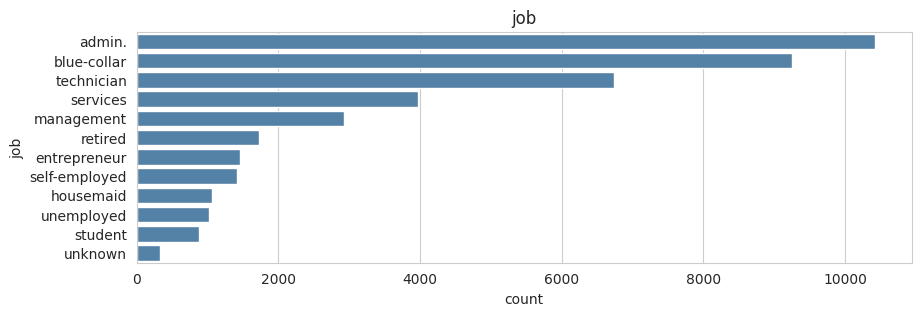

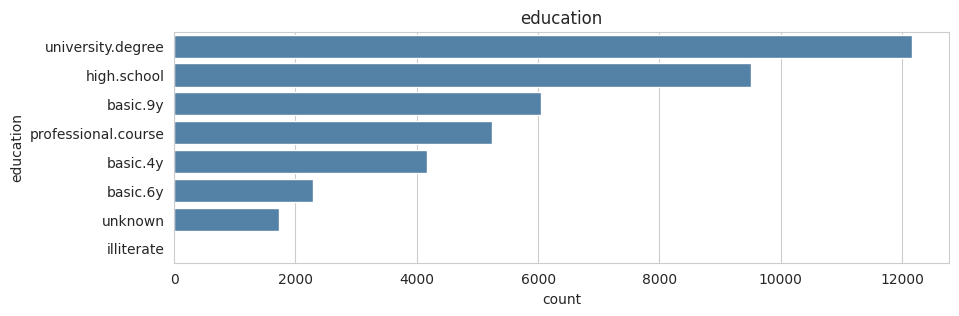

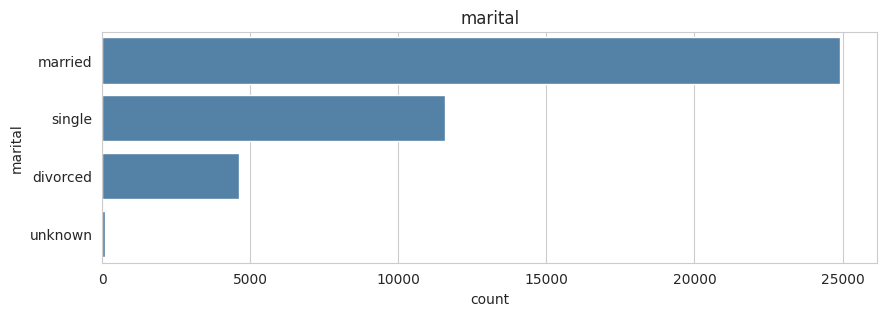

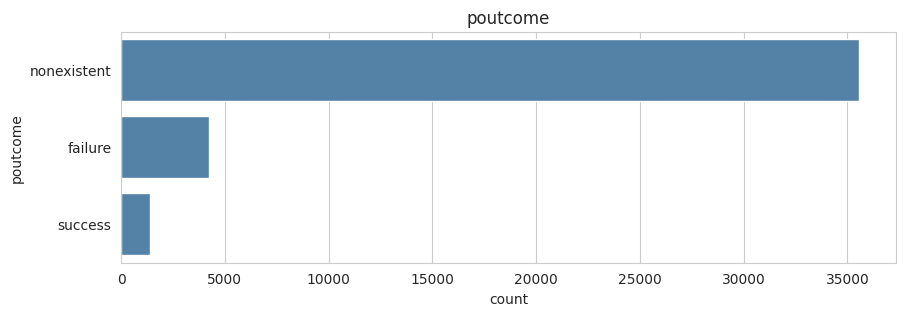

In [ ]:
for col in categorical:
  vizCategoricalData(col)

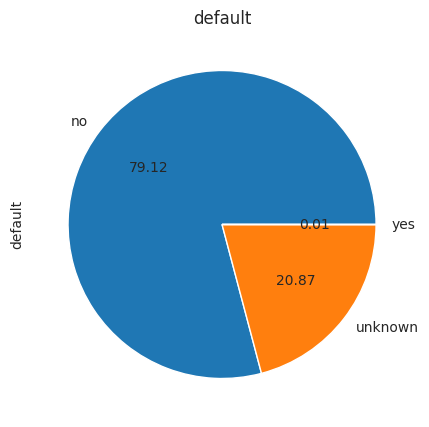

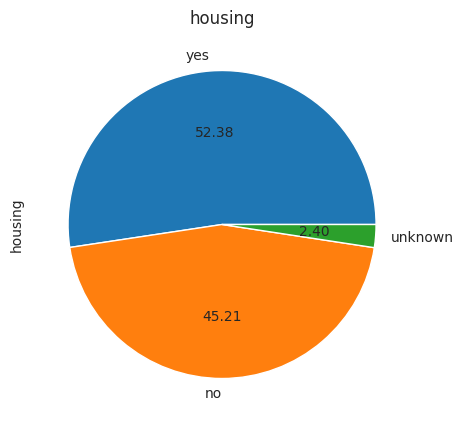

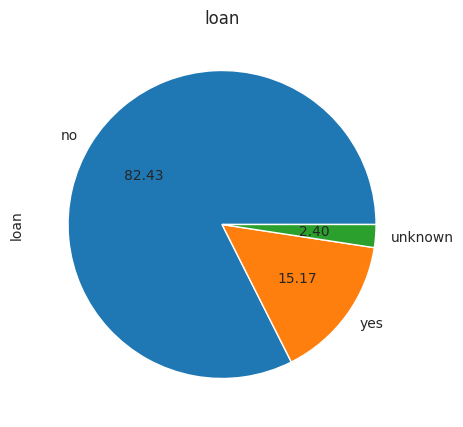

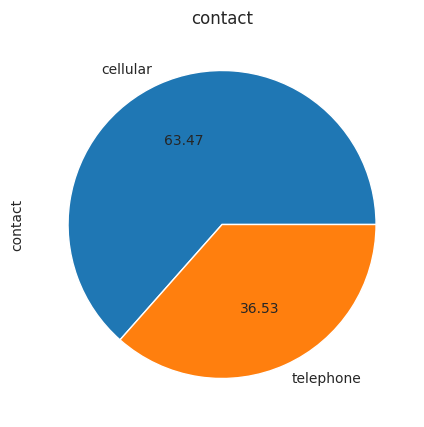

In [ ]:
for col in binary:
  plt.figure(figsize=(5,5))
  df[col].value_counts().plot(kind="pie",autopct="%.2f")
  plt.title(col)

For the default credit, it seemsw we have a high number of 'unknown' instances.
For other features we have low or no number of 'unknown' data.

In [ ]:
# converting the month and day of week columns to numerical values. For month 1-12, for day of the week: 0-6
month_abbrevs = list(map(str.lower, list(calendar.month_abbr)))
day_abbrevs = list(map(str.lower, list(calendar.day_abbr)))

In [ ]:
df['month'] = df['month'].apply(lambda x: month_abbrevs.index(x))
df['day_of_week'] = df['day_of_week'].apply(lambda x: day_abbrevs.index(x))

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,5,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


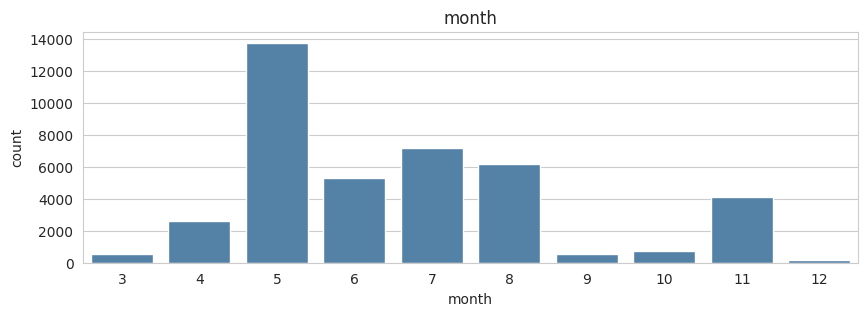

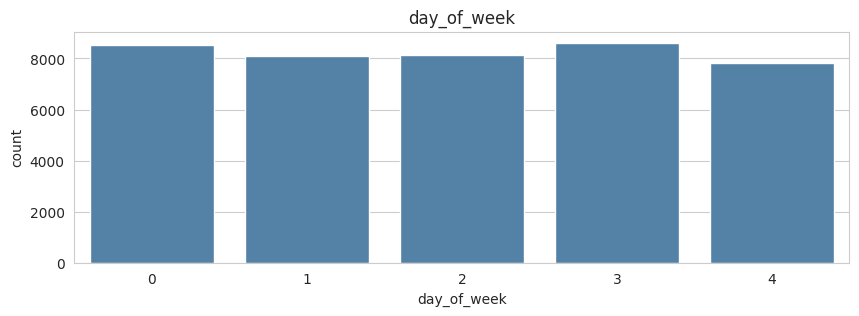

In [ ]:
for col in time:
  plt.figure(figsize=(10,3))
  sns.set_style("whitegrid")
  sns.countplot(x=col,data = df, color='steelblue').set(title=col)

There isn't significant difference between the day of the weeks.
For the monthly distribution of contact, may was the busiest month.

In [ ]:
df[continuous_features].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


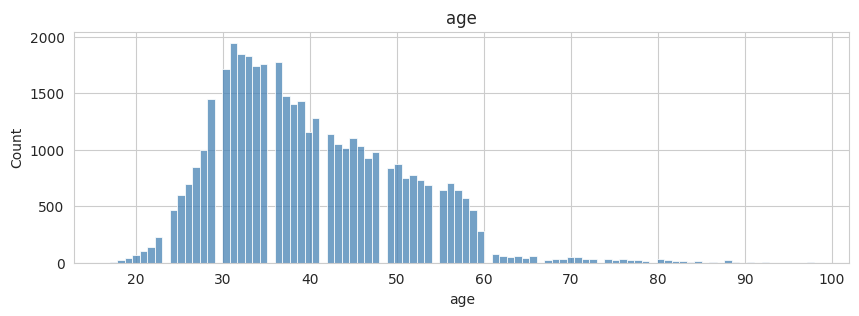

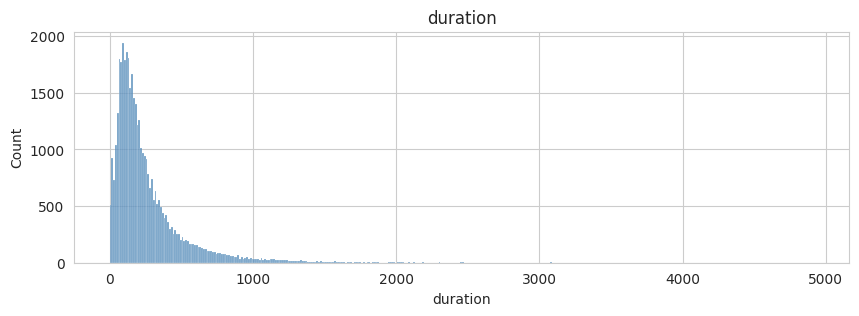

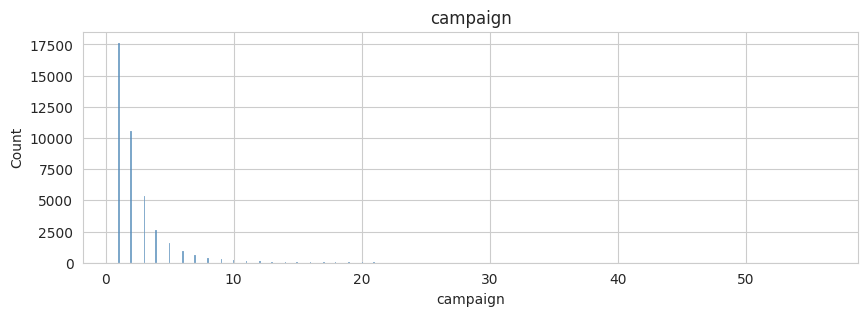

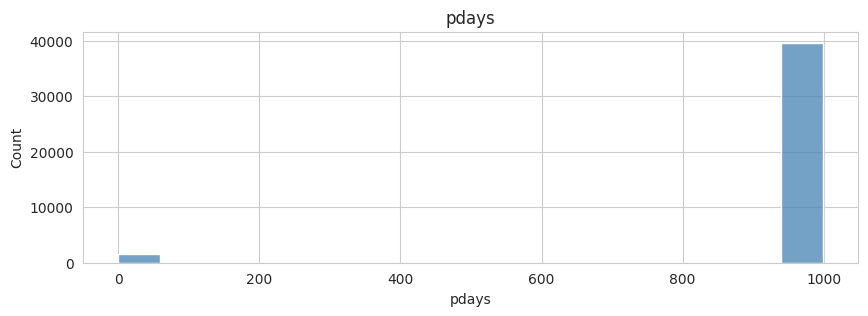

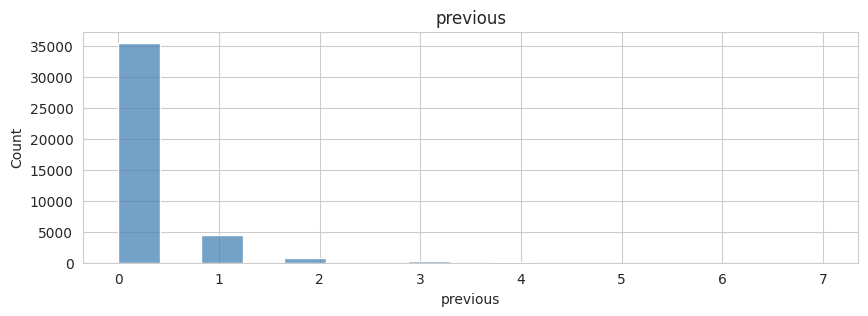

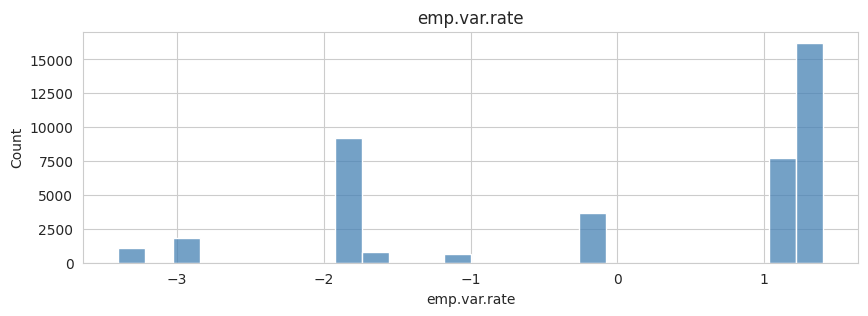

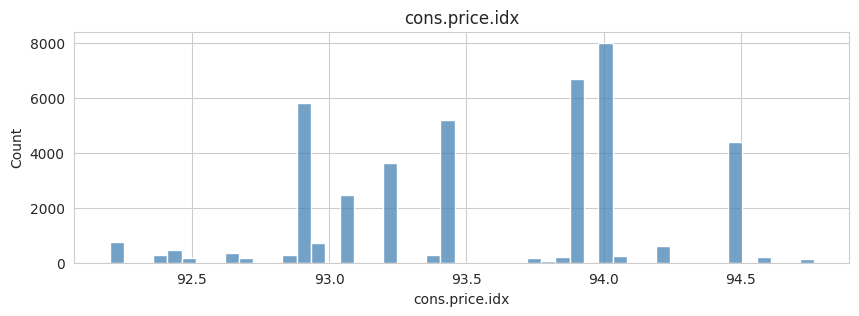

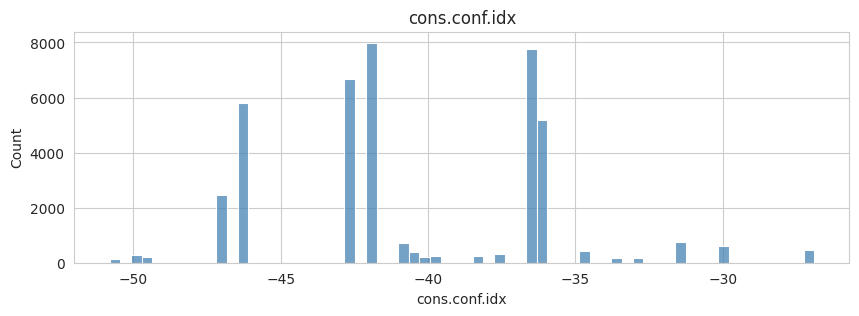

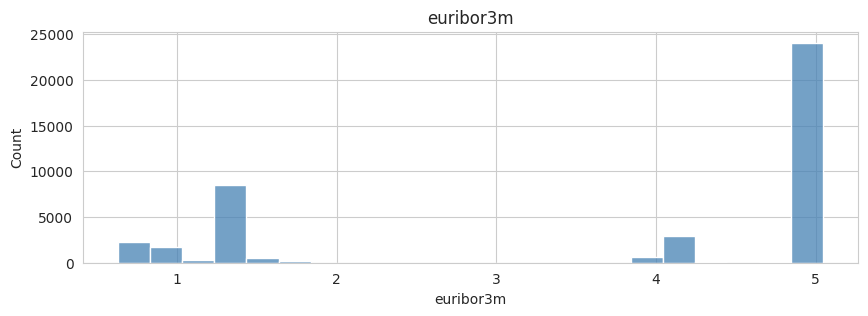

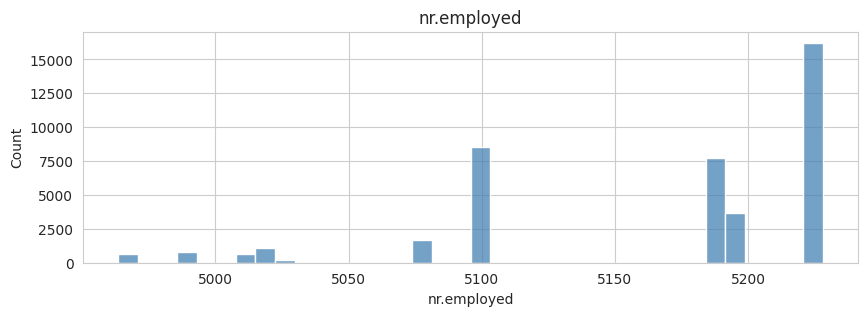

In [ ]:
for col in continuous_features:
  plt.figure(figsize=(10,3))
  sns.set_style("whitegrid")
  sns.histplot(x=col,data = df, color='steelblue').set(title=col)

Checking the distribution of numerical features:
The distribution of age, duration and campaign are skewed to the left.
For the other feautures we have a relatively low number of unique values. Many of these attributes contains monthly/quarterly aggregated data.

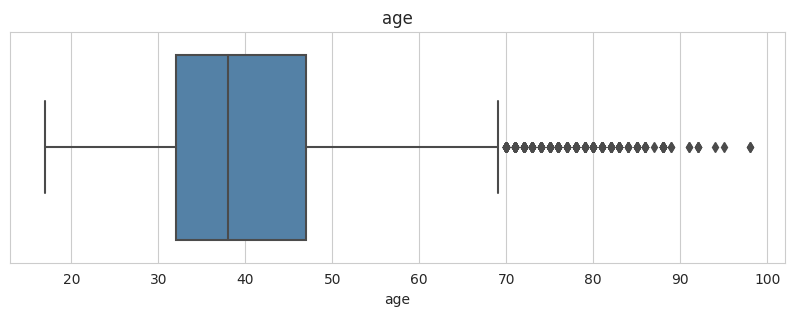

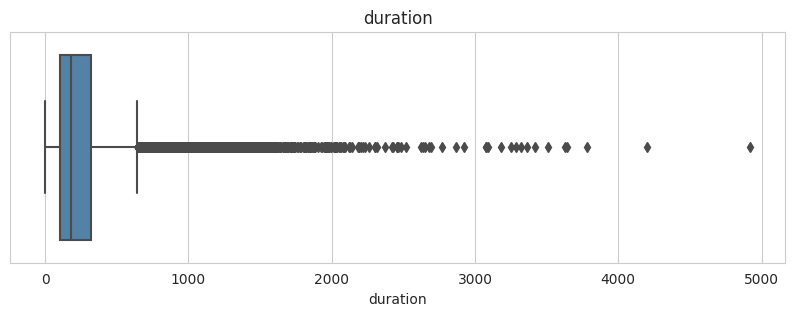

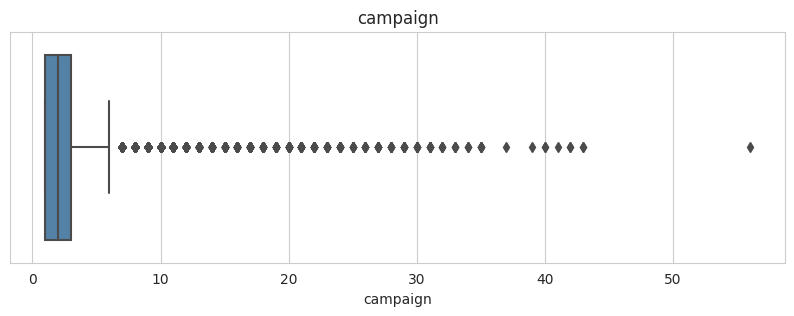

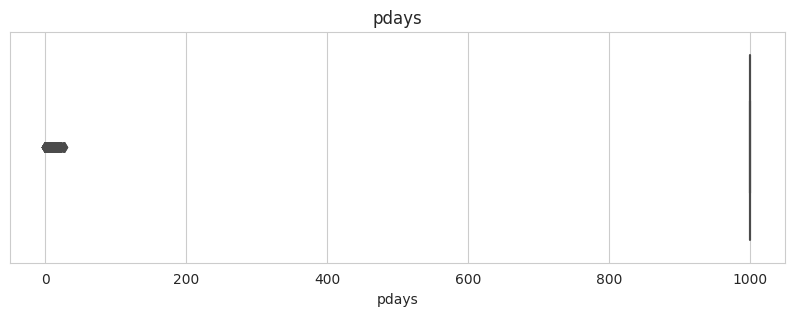

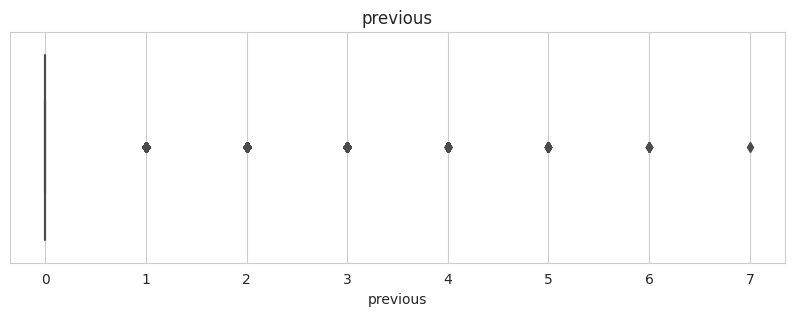

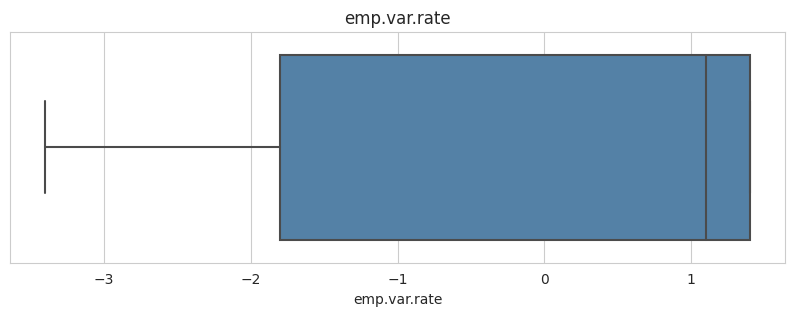

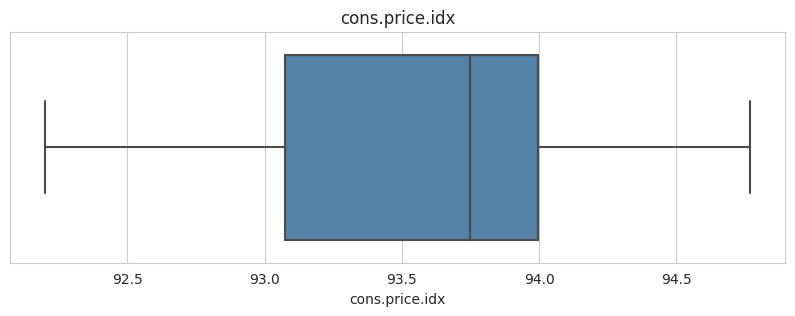

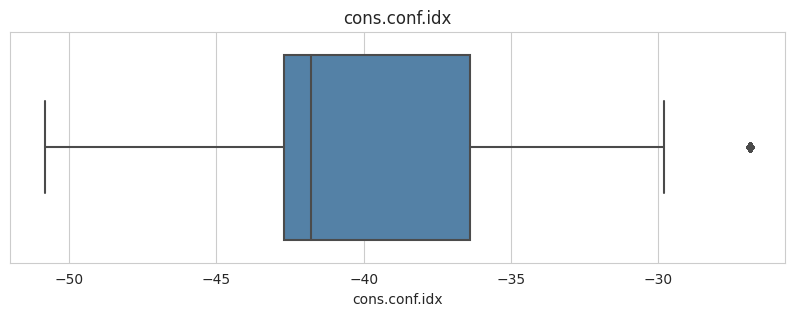

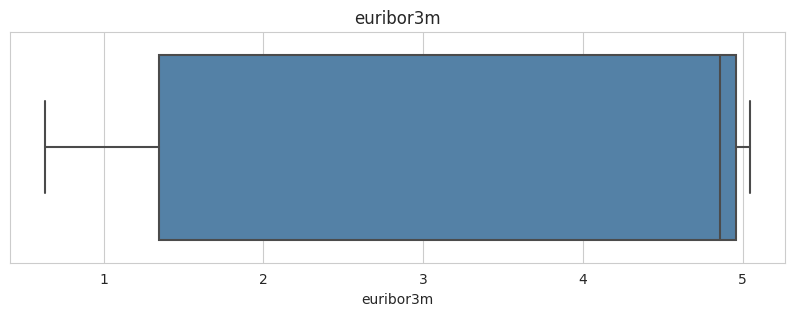

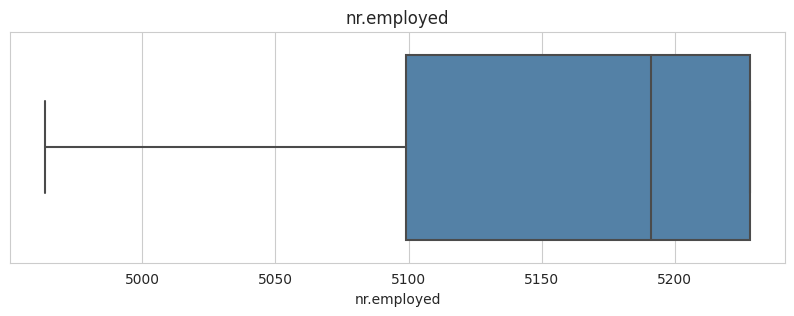

In [ ]:
for col in continuous_features:
  plt.figure(figsize=(10,3))
  sns.set_style("whitegrid")
  sns.boxplot(x=col,data = df, color='steelblue').set(title=col)

The boxplots for numerical features show higher number of outliers in the cases of age, duration and campaign.

For pdays, there is a high number of records with 999 value, which indicates that the client was not contacted previously. Because of this I convert this feature to categorical: Whether the client was contected before or not.

#### 2. Multivariate analysis: consider features in pairs, try to introduce new features to consider their relationship with other features, etc. (10%)

In [ ]:
df['contacted_before'] = np.where(df['pdays']<999, 1, 0)

In [ ]:
# Creating bins for analysing different age groups.
df['age_bins'] = pd.cut(df['age'], [0, 20, 30,40,60,100])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,0,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(40, 60]"
1,57,services,married,high.school,unknown,no,no,telephone,5,0,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(40, 60]"
2,37,services,married,high.school,no,yes,no,telephone,5,0,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(30, 40]"
3,40,admin.,married,basic.6y,no,no,no,telephone,5,0,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(30, 40]"
4,56,services,married,high.school,no,no,yes,telephone,5,0,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(40, 60]"


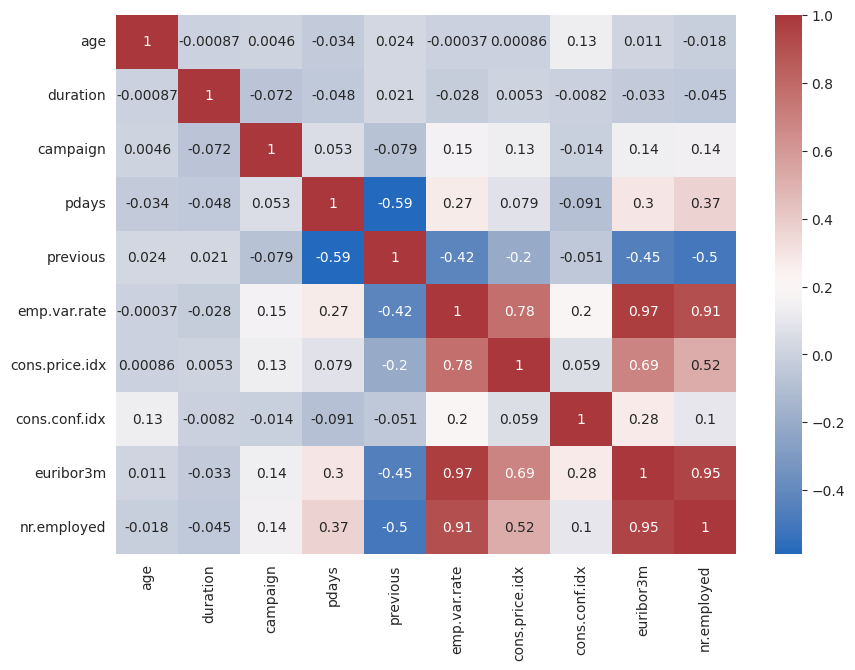

In [ ]:
corrmat = df[continuous_features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, cmap='vlag', annot = True);

In [ ]:
def creatChartsfory(col):
  f, ax = plt.subplots(figsize=(15, 3))
  sns.set_style("whitegrid")
  sns.countplot(x=col,data=df, hue='y').set(title=col)

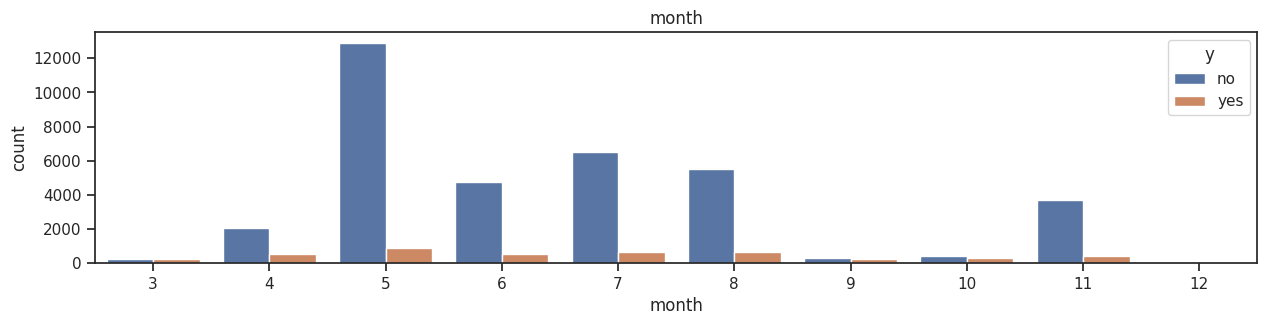

In [ ]:
creatChartsfory('month')

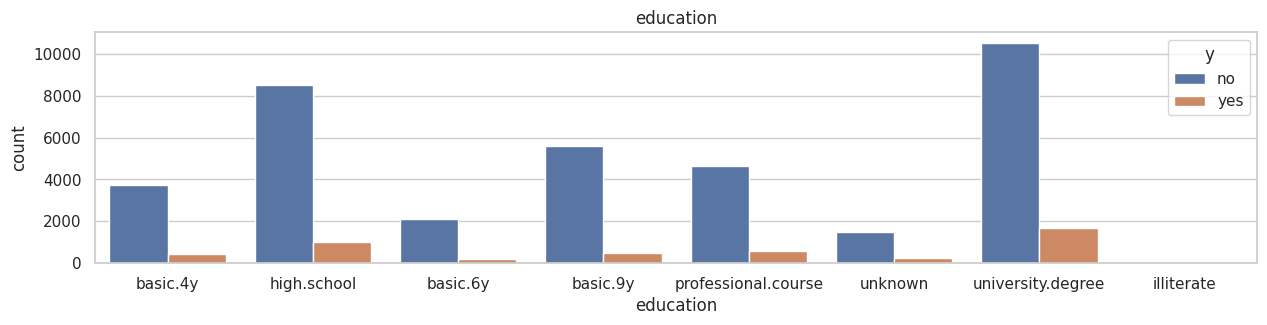

In [ ]:
creatChartsfory('education')

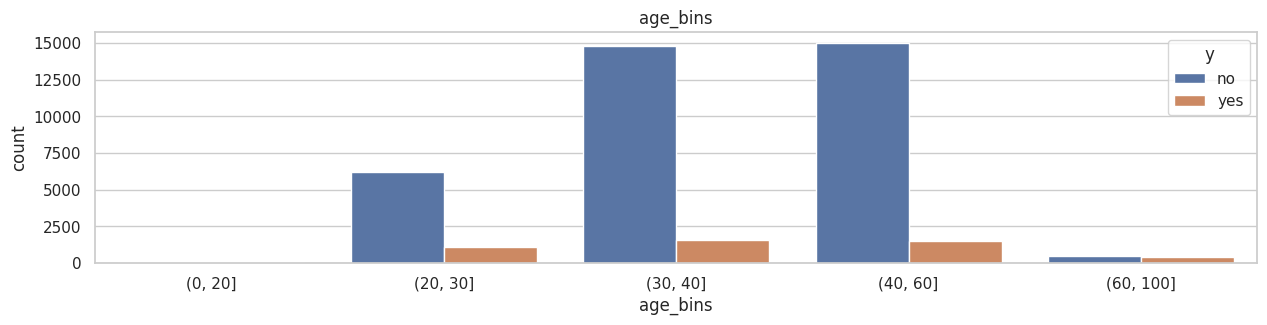

In [ ]:
creatChartsfory('age_bins')

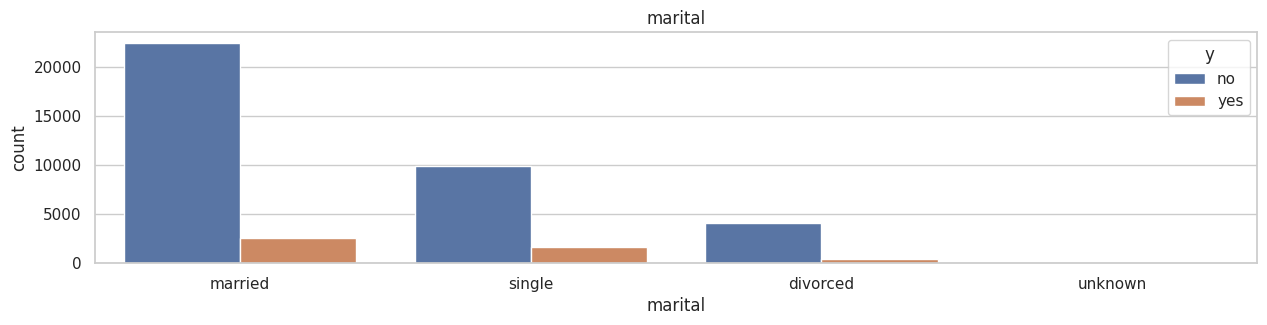

In [ ]:
creatChartsfory('marital')

[Text(0.5, 1.0, 'duration')]

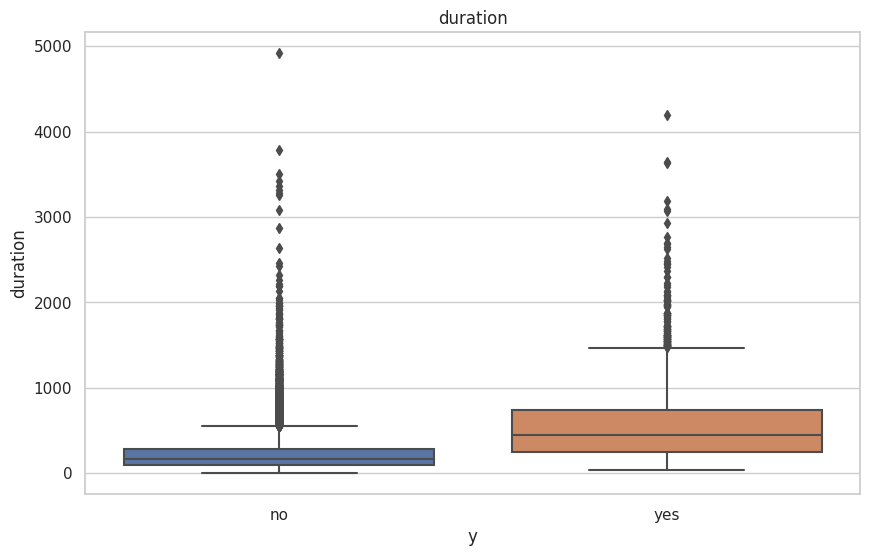

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(y='duration',data = df,x='y').set(title='duration')

[Text(0.5, 1.0, 'duration')]

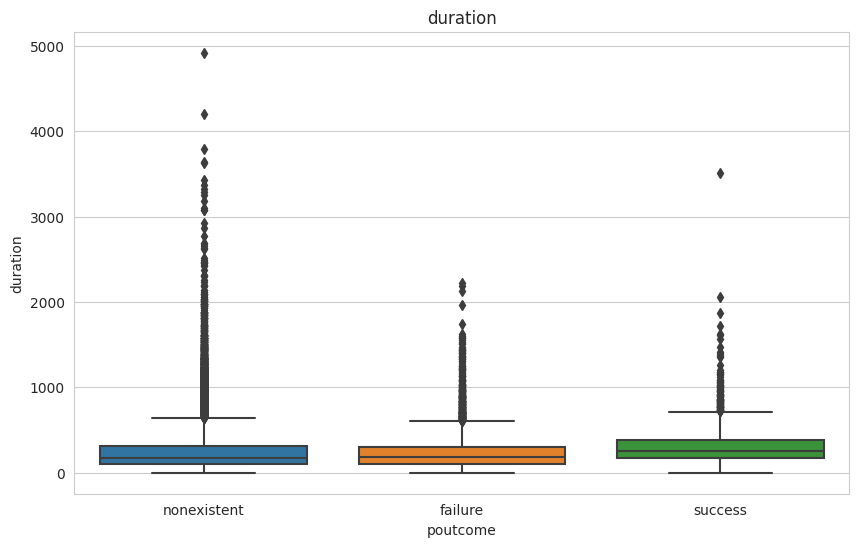

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(y='duration',data = df,x='poutcome').set(title='duration')

[Text(0.5, 1.0, 'campaign')]

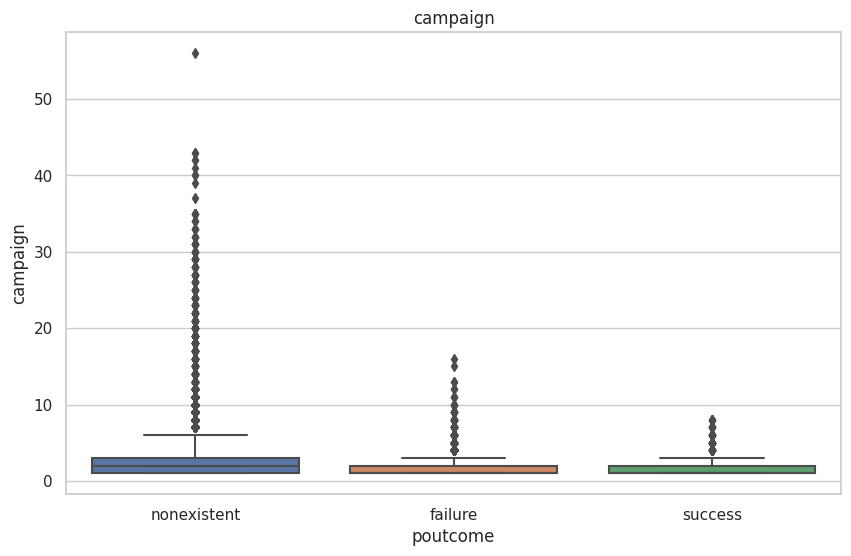

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(y='campaign',data = df,x='poutcome').set(title='campaign')

[Text(0.5, 1.0, 'campaign')]

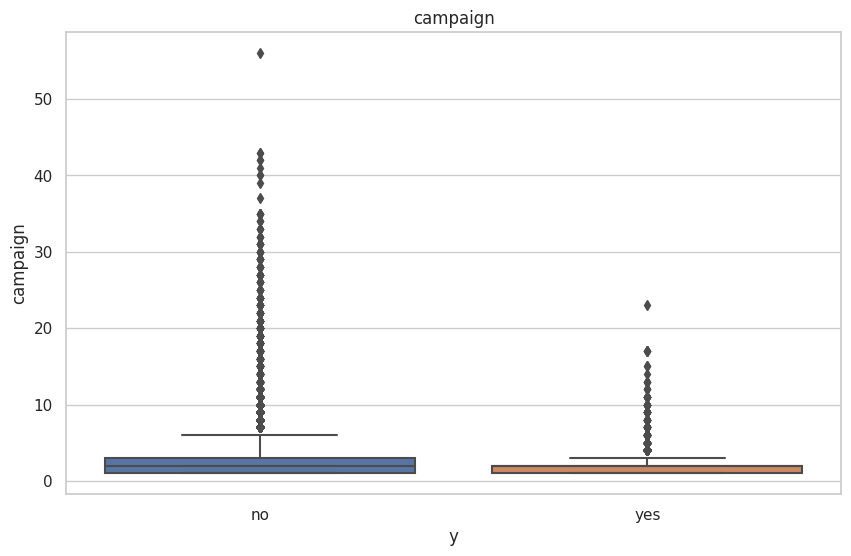

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.boxplot(y='campaign',data = df,x='y').set(title='campaign')

## Part 2: DP (15% max)

Prepare data to dimensionality reduction step:

* Fill missing values if needed, explain the selected strategy (5%)
* Deal with outliers  if needed, explain the selected strategy (5%)
* Prepare categorical data if needed (5%)

In [ ]:
cols_with_unknown = categorical + binary
to_remove = ['poutcome','contact']
cols_with_unknown = [i for i in cols_with_unknown if i not in to_remove]

In [ ]:
data = df[cols_with_unknown]
data[data=='unknown'] = np.nan

Checking categorical data for missing values. As for 'default' column, we have a high number of "unknown' category and very low number of "yes" (only 3 instances), I decide to drop this column.

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
default,8597,0.208726
education,1731,0.042027
housing,990,0.024036
loan,990,0.024036
job,330,0.008012
marital,80,0.001942


There are also some rows, where multiple attributes are missing. I decided to drop rows with too many missing values.

In [ ]:
total = data.isnull().sum(axis=1).sort_values(ascending=False)
percent = (data.isnull().sum(axis=1)/21).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
2723,5,0.238095
21556,5,0.238095
16841,4,0.190476
2006,4,0.190476
7329,4,0.190476
17421,4,0.190476
29,4,0.190476
11047,4,0.190476
15920,4,0.190476
12610,4,0.190476


In [ ]:
df.loc[[2723]]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,age_bins
2723,45,unknown,married,unknown,unknown,unknown,unknown,telephone,5,2,...,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no,0,"(40, 60]"


In [ ]:
df.loc[[29]]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before,age_bins
29,55,unknown,married,university.degree,unknown,unknown,unknown,telephone,5,0,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,"(40, 60]"


In [ ]:
len(missing_data[missing_data['Percent']>0.15])

22

In [ ]:
indexPerc = missing_data[missing_data['Percent']>0.15].index

In [ ]:
df.drop(indexPerc , inplace=True)

In [ ]:
df.drop(columns=['default'],inplace=True)

In [ ]:
cols = ['age', 'duration', 'campaign']
for c in cols:
  top5 = df[c].quantile(0.95)
  df = df[df[c] < top5]

In [ ]:
df.shape

(34791, 22)

For transformations, I created the following 4 categories:
- Continuous_cols: numerical features, not containing missing values, as their distribution skewed I am using MimMaxScaler
- Categorical_cols: These features contains multiple categories, there are only 'unknown" category, but not null values. In this case I am using One Hot Encoding
- Binary_cols: These are originally yes/no columns, so in this cas "unknown" category needs to be handeld, by imputing most frequent values. In this case I used ordinal encoding.
-  For the month and day of the week I used trigonometrical transformations:
(https://towardsdatascience.com/stop-one-hot-encoding-your-time-based-features-24c699face2f
https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html)

In [ ]:
continuous_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_cols = ['job', 'education','marital','poutcome']
binary_cols = ['contacted_before','housing','loan','contact']
time_cols = ['month','day_of_week']

In [ ]:
df[df[binary_cols]=='unknown'] = np.nan

In [ ]:
df.isnull().any()

age                 False
job                 False
marital             False
education           False
housing              True
loan                 True
contact             False
month               False
day_of_week         False
duration            False
campaign            False
pdays               False
previous            False
poutcome            False
emp.var.rate        False
cons.price.idx      False
cons.conf.idx       False
euribor3m           False
nr.employed         False
y                   False
contacted_before    False
age_bins            False
dtype: bool

In [ ]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [ ]:
num_pipe = Pipeline([
  ('scaler', MinMaxScaler()),
  ('variance_trsh', VarianceThreshold(threshold=0.15))
])

cat_pipe = Pipeline([
    ('ohe', OneHotEncoder()),
    ('variance_trsh', VarianceThreshold(threshold=.97 * (1-.97)))
])

ord_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

pipe = ColumnTransformer(transformers=[
    ('cat', cat_pipe, categorical_cols),
    ('label', ord_pipe, binary_cols),
    ('num', num_pipe, continuous_cols),
    ("month_sin", sin_transformer(12), ["month"]),
    ("month_cos", cos_transformer(12), ["month"]),
    ("weekday_sin", sin_transformer(7), ["day_of_week"]),
    ("weekday_cos", cos_transformer(7), ["day_of_week"])
])

In [ ]:
X = pipe.fit_transform(df)

In [ ]:
X.shape

(34791, 29)

In [ ]:
np.save('prepared_data.npy', X)

## Part 3: DR (30% max)

**Overview**

Use the same dataset you've used during this module. It would be nice if you save the result from the data preparation step and use it in the current task.

The main goal here is to use different dimensionality reduction techniques and show results


####   **Evaluation criteria**


1.    at least 3 different dimensionality reductions techniques (SVD, t-SNE, PCA, NMF, UMAP) used (15%)
2.    add visualizations for 3 different dimensionality reductions techniques (5%)
3.    calculate explained variance for 2 different dimensionality reductions techniques (5%)
4.    select the best number of components for at least 1 dimensionality reduction technique (5%)

#### PCA

In [ ]:
x = np.load('prepared_data.npy')

In [ ]:
pca = PCA(n_components=2)
new_X = pca.fit_transform(X)

In [ ]:
plot_df = pd.DataFrame.from_records(data=new_X[:,:2], columns=["x","y"])
plot_df["target"] = df['y']

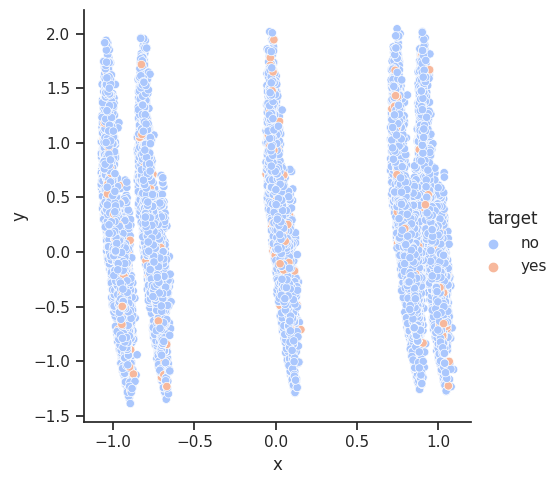

In [ ]:
sns.set(style='ticks')
sns.relplot(x="x",y="y", data=plot_df, hue="target",palette="coolwarm")

In [ ]:
pca.explained_variance_ratio_.sum()

0.2575147317983682

In [ ]:
pca = PCA(n_components=0.95).fit(X)

len(pca.explained_variance_ratio_)

19

Checking the result of PCA, in the case of 2 components, we have a low number of explained variance.

If we check it for 95% of explained variance, we need 19 component to reach that.

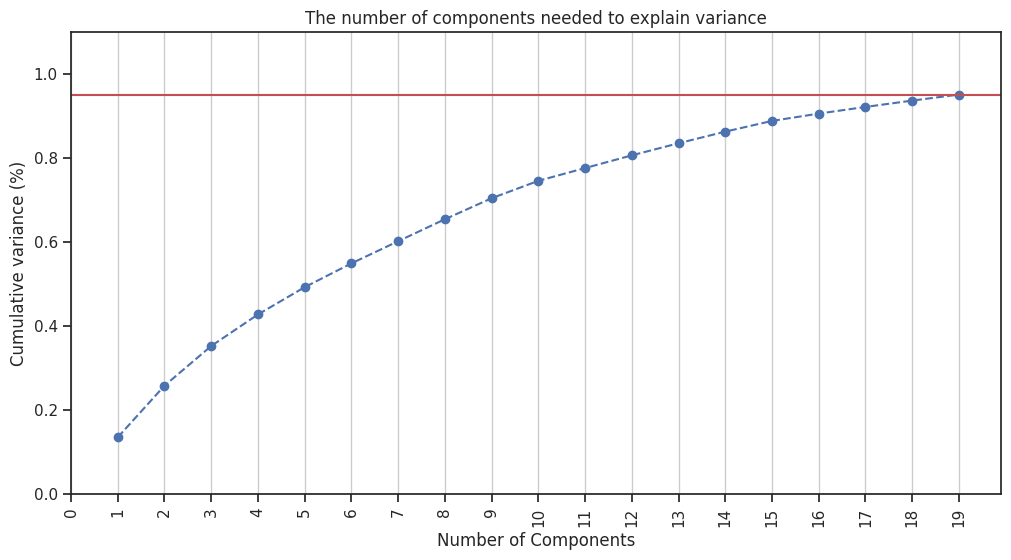

In [ ]:
number_of_ticks = len(pca.explained_variance_ratio_) + 1

fig, ax = plt.subplots(figsize=(12,6))
x_ticks = np.arange(1, number_of_ticks, step=1)
y_values = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0, 1.1)
plt.plot(x_ticks, y_values, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, number_of_ticks,step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')

ax.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

#### SVD

In [ ]:
svd = TruncatedSVD(n_components=2, algorithm='arpack')
scd_X = svd.fit_transform(X)

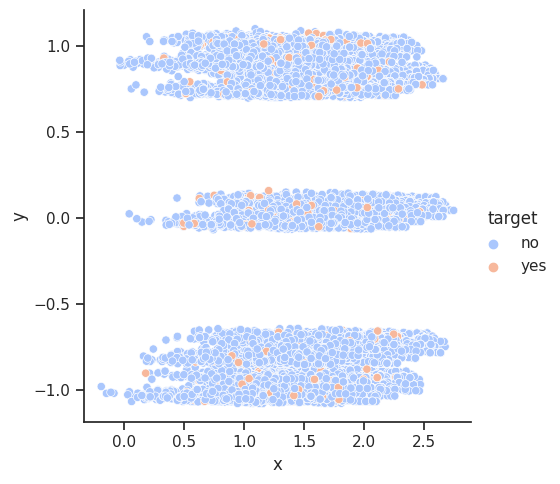

In [ ]:
plot_df = pd.DataFrame.from_records(data=scd_X[:,:2], columns=["x","y"])
plot_df["target"] = df['y']

sns.set(style='ticks')
sns.relplot(x="x",y="y", data=plot_df, hue="target",palette="coolwarm")

In [ ]:
svd.explained_variance_ratio_.sum()

0.18491343432627594

In the case of 2 components the SVD has a lower explained variance than PCA.

In [ ]:
embedding = umap.UMAP(n_neighbors=30, min_dist=0.15).fit_transform(X)

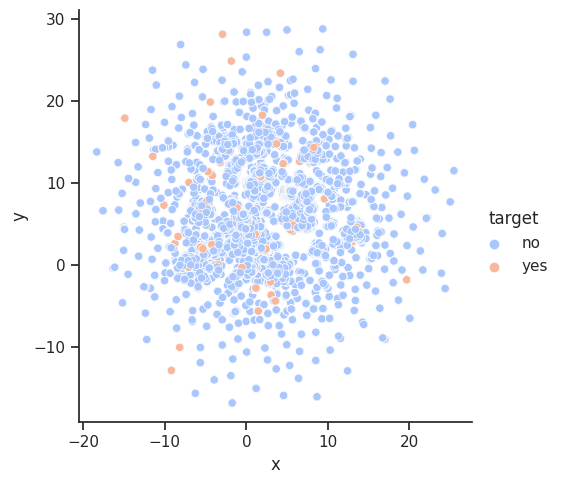

In [ ]:
plot_df = pd.DataFrame.from_records(data=embedding, columns=["x","y"])
plot_df["target"] = df['y']

sns.set(style='ticks')
sns.relplot(x="x",y="y", data=plot_df, hue="target",palette="coolwarm")

For UMAP we can't see separation between the different target groups.